In [24]:
import numpy as np
import pandas as pd
import json
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import VotingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datascience import *
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('extracted_dataset.csv')
df.head()

,Course Code,Course Title,Type,Course Year,Student Number,Department Code,Course Level,GPA,Standing,Completed Credits,...,GPA Student - Subject,Avg. Grade - Taken,Avg. Grade - Students_Subject,Letter Grade,Status,Semester,Theoritical,Practical,Course Credit,ECTS
0,UNI 113,Textual Analysis and Effective Com. I,NaN,1,351,IE,Undergraduate,4.05,Freshman,18,...,4.050000,2.120833,2.703226,A+,Successful,2010 - Fall,3,0,3,5
1,MGT 553,Yöneticiler İçin Hukuk,NaN,5,1181,MBA/NT,Graduate,3.38,Freshman,15,...,3.400000,3.228571,3.353425,B+,Successful,2010 - Fall,3,0,3,5
2,EM 475,Stratejik Yönetim,NaN,4,1227,MBA/NT,Graduate,3.00,Freshman,15,...,3.300000,3.227273,3.227273,B+,Successful,2010 - Fall,3,0,3,5
3,MGT 511,Küresel Yönetim Düşüncesi,NaN,5,1182,MBA/NT,Graduate,3.54,Freshman,15,...,3.500000,3.576471,3.353425,A-,Successful,2010 - Fall,3,0,3,5
4,UNI 101,Mathematical Reasoning,NaN,1,344,EE,Undergraduate,4.03,Freshman,18,...,4.033333,2.144444,2.703226,A,Successful,2010 - Fall,3,0,3,5


In [3]:
grad_courses = []
for idx in df.index:
    if df.iloc[idx, 3] > 4:
        grad_courses.append(idx)
for row_index in grad_courses:
    df.drop(row_index, inplace=True)
df.index = range(len(df))
df

,Course Code,Course Title,Type,Course Year,Student Number,Department Code,Course Level,GPA,Standing,Completed Credits,...,GPA Student - Subject,Avg. Grade - Taken,Avg. Grade - Students_Subject,Letter Grade,Status,Semester,Theoritical,Practical,Course Credit,ECTS
0,UNI 113,Textual Analysis and Effective Com. I,NaN,1,351,IE,Undergraduate,4.05,Freshman,18,...,4.050000,2.120833,2.703226,A+,Successful,2010 - Fall,3,0,3,5
1,EM 475,Stratejik Yönetim,NaN,4,1227,MBA/NT,Graduate,3.00,Freshman,15,...,3.300000,3.227273,3.227273,B+,Successful,2010 - Fall,3,0,3,5
2,UNI 101,Mathematical Reasoning,NaN,1,344,EE,Undergraduate,4.03,Freshman,18,...,4.033333,2.144444,2.703226,A,Successful,2010 - Fall,3,0,3,5
3,UNI 203,Understanding Science and Technology,NaN,2,344,EE,Undergraduate,4.03,Freshman,18,...,4.033333,3.176000,2.703226,A,Successful,2010 - Fall,3,0,3,5
4,UNI 203,Understanding Science and Technology,NaN,2,240,SOC,Undergraduate,2.62,Freshman,18,...,2.616667,3.176000,2.703226,B,Successful,2010 - Fall,3,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44151,PHYS 104L,Physics II - Lab,NaN,1,2001,CS,Undergraduate,2.57,Freshman,21,...,3.000000,2.567082,2.166329,A-,Successful,2014 - Spring,0,2,1,1
44152,EECS 202,Basic Digital Communication with Networking,NaN,2,1313,EE,Undergraduate,2.40,Sophomore,19,...,1.740000,1.980226,2.278289,B-,Successful,2014 - Spring,3,2,4,6
44153,UNI 117,Understanding Society and Culture,NaN,1,2006,EE,Undergraduate,1.49,Freshman,18,...,2.000000,1.923731,2.448116,D,Successful,2014 - Spring,3,0,3,5
44154,EECS 218,Digital Logic Design,NaN,2,1310,EE,Undergraduate,1.86,Sophomore,15,...,0.833333,2.274528,2.278289,F,Unsuccessful,2014 - Spring,3,0,3,5


In [4]:
df.drop([df.columns[0], df.columns[1], df.columns[2], df.columns[4]], inplace=True, axis=1)
df.head()

,Course Year,Department Code,Course Level,GPA,Standing,Completed Credits,Completed ECTS,GPA Student - Subject,Avg. Grade - Taken,Avg. Grade - Students_Subject,Letter Grade,Status,Semester,Theoritical,Practical,Course Credit,ECTS
0,1,IE,Undergraduate,4.05,Freshman,18,30,4.050000,2.120833,2.703226,A+,Successful,2010 - Fall,3,0,3,5
1,4,MBA/NT,Graduate,3.00,Freshman,15,25,3.300000,3.227273,3.227273,B+,Successful,2010 - Fall,3,0,3,5
2,1,EE,Undergraduate,4.03,Freshman,18,30,4.033333,2.144444,2.703226,A,Successful,2010 - Fall,3,0,3,5
3,2,EE,Undergraduate,4.03,Freshman,18,30,4.033333,3.176000,2.703226,A,Successful,2010 - Fall,3,0,3,5
4,2,SOC,Undergraduate,2.62,Freshman,18,30,2.616667,3.176000,2.703226,B,Successful,2010 - Fall,3,0,3,5


In [5]:
df = pd.concat([df, pd.get_dummies(df['Course Year'], prefix='Course Year'), pd.get_dummies(df['Department Code'], prefix='Department Code'), pd.get_dummies(df['Course Level'], prefix='Course Level'), pd.get_dummies(df['Standing'], prefix='Standing'), pd.get_dummies(df['Status'], prefix='Status')], axis=1)
df.drop(['Course Year', 'Department Code', 'Course Level', 'Status', 'Standing'], axis=1, inplace=True)
df

,GPA,Completed Credits,Completed ECTS,GPA Student - Subject,Avg. Grade - Taken,Avg. Grade - Students_Subject,Letter Grade,Semester,Theoritical,Practical,...,Department Code_İHP,Course Level_Graduate,Course Level_Undergraduate,Standing_Freshman,Standing_Junior,Standing_Senior,Standing_Sophomore,Status_Recorded,Status_Successful,Status_Unsuccessful
0,4.05,18,30,4.050000,2.120833,2.703226,A+,2010 - Fall,3,0,...,0,0,1,1,0,0,0,0,1,0
1,3.00,15,25,3.300000,3.227273,3.227273,B+,2010 - Fall,3,0,...,0,1,0,1,0,0,0,0,1,0
2,4.03,18,30,4.033333,2.144444,2.703226,A,2010 - Fall,3,0,...,0,0,1,1,0,0,0,0,1,0
3,4.03,18,30,4.033333,3.176000,2.703226,A,2010 - Fall,3,0,...,0,0,1,1,0,0,0,0,1,0
4,2.62,18,30,2.616667,3.176000,2.703226,B,2010 - Fall,3,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44151,2.57,21,33,3.000000,2.567082,2.166329,A-,2014 - Spring,0,2,...,0,0,1,1,0,0,0,0,1,0
44152,2.40,19,31,1.740000,1.980226,2.278289,B-,2014 - Spring,3,2,...,0,0,1,0,0,0,1,0,1,0
44153,1.49,18,28,2.000000,1.923731,2.448116,D,2014 - Spring,3,0,...,0,0,1,1,0,0,0,0,1,0
44154,1.86,15,24,0.833333,2.274528,2.278289,F,2014 - Spring,3,0,...,0,0,1,0,0,0,1,0,0,1


In [6]:
columns = df.columns
columns

Index(['GPA', 'Completed Credits', 'Completed ECTS', 'GPA Student - Subject',
       'Avg. Grade - Taken', 'Avg. Grade - Students_Subject', 'Letter Grade',
       'Semester', 'Theoritical', 'Practical', 'Course Credit', 'ECTS',
       'Course Year_1', 'Course Year_2', 'Course Year_3', 'Course Year_4',
       'Department Code_CS', 'Department Code_CTV', 'Department Code_CULT/T',
       'Department Code_DSE/T', 'Department Code_ECE/NT',
       'Department Code_ECE/T', 'Department Code_EE', 'Department Code_HIST',
       'Department Code_HIST PhD', 'Department Code_HIST/T',
       'Department Code_HUK', 'Department Code_IE', 'Department Code_ISE/NT',
       'Department Code_ISE/T', 'Department Code_ISS', 'Department Code_ITM',
       'Department Code_LIT', 'Department Code_MBA/NT', 'Department Code_MGT',
       'Department Code_MTS/T', 'Department Code_PHIL', 'Department Code_POLS',
       'Department Code_POLS/NT', 'Department Code_POLS/T',
       'Department Code_PSY', 'Department Code_

In [7]:
le = LabelEncoder()
le.fit(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F'])

LabelEncoder()

In [8]:
def get_train_data(df, train_sem, columns):
    dataFrame = pd.DataFrame(columns=columns)
    for sem in train_sem:
        dataFrame = pd.concat([dataFrame, df[df.iloc[:, 7] == sem]], ignore_index=True)
    for idx in dataFrame.index:
        semester = dataFrame.iloc[idx, 7]
        dataFrame.iloc[idx, 7] = semester.split()[2].strip()
    
    X_train = dataFrame.drop('Semester', axis=1)
    y_train = le.transform(X_train.pop('Letter Grade'))
    return X_train, y_train

In [9]:
def normalize_X(X):
    cols = X.columns
    sc = StandardScaler()
    X = sc.fit_transform(X)
    return pd.DataFrame(X, columns=cols)

In [26]:
def get_error_score(df, columns, model):
    error_scores = {}
    sorted_semesters = sorted(set(df.iloc[:, 7]))
    for sem_idx in range(1, len(sorted_semesters)):
        training_sem = sorted_semesters[:sem_idx]
        test_sem = sorted_semesters[sem_idx]
        X_train, y_train = get_train_data(df, training_sem, columns)
        X_test = df[df.iloc[:, 7] == test_sem]
        X_test.drop('Semester', axis=1, inplace=True)
        y_test = le.transform(X_test.pop('Letter Grade'))
        
        X_train = normalize_X(X_train)
        X_test = normalize_X(X_test)
        model.fit(X_train, y_train)
        
        y_pred_test = model.predict(X_test)
        mae_test = round(mean_absolute_error(y_test, y_pred_test), 3)
        mse_test = round(mean_squared_error(y_test, y_pred_test), 3)
        r2_test = round(r2_score(y_test, y_pred_test), 3)
        
        y_pred_train = model.predict(X_train)
        mae_train = round(mean_absolute_error(y_train, y_pred_train),3)
        mse_train = round(mean_squared_error(y_train, y_pred_train),3)
        r2_train = round(r2_score(y_train, y_pred_train),3)
        
        print(sem_idx, model.score(X_train, y_train), model.score(X_test, y_test))
        
        error_scores.setdefault(sem_idx, {})
        error_scores[sem_idx]['mae'] = [mae_train, mae_test]
        error_scores[sem_idx]['mse'] = [mse_train, mse_test]
        error_scores[sem_idx]['r2'] = [r2_train, r2_test]        
        
    return error_scores

In [11]:
def plot_error_score(df, columns, model):
    scores = get_error_score(df, columns, model)
    table = Table().with_column('Number of Training Semesters', scores.keys())
    error_scores = {}
    for k in sorted(scores):
        for metric in scores[k]:
            error_scores.setdefault(metric + ' train', [])
            error_scores[metric + ' train'].append(scores[k][metric][0])
            error_scores.setdefault(metric + ' test', [])
            error_scores[metric + ' test'].append(scores[k][metric][1])
    
    for model in error_scores:
        table = table.with_column(model, error_scores[model])

    table.plot('Number of Training Semesters')
    return table

In [15]:
with open('Tuned Hyperparameters/adaboost_tuned_params.json') as tuned_dict:
    adaboost_data = json.loads(tuned_dict.read())
    print(adaboost_data)

{'tuned_adaboost': {'loss': 'linear', 'n_estimators': 50}}


In [16]:
clf_1 = AdaBoostRegressor(loss=adaboost_data['tuned_adaboost']['loss'], n_estimators=adaboost_data['tuned_adaboost']['n_estimators'])

In [17]:
with open('Tuned Hyperparameters/bayesian_tuned_params.json') as tuned_dict:
    bayesian_data = json.loads(tuned_dict.read())
    print(bayesian_data)

{'tuned_bayesian': {'alpha_1': 1e-06, 'alpha_2': 0.0001, 'lambda_1': 0.0001, 'lambda_2': 1e-08, 'n_iter': 300}}


In [19]:
clf_2 = BayesianRidge(alpha_1=bayesian_data['tuned_bayesian']['alpha_1'], 
                          alpha_2=bayesian_data['tuned_bayesian']['alpha_2'],
                          lambda_1=bayesian_data['tuned_bayesian']['lambda_1'],
                          lambda_2=bayesian_data['tuned_bayesian']['lambda_2'],
                          n_iter=bayesian_data['tuned_bayesian']['n_iter'])

In [20]:
with open('Tuned Hyperparameters/ridge_tuned_params.json') as tuned_dict:
    ridge_data = json.loads(tuned_dict.read())
    print(ridge_data)

{'tuned_ridge': {'alpha': 100.0}}


In [21]:
clf_3 = Ridge(alpha=ridge_data['tuned_ridge']['alpha'])

In [22]:
mjvoting = VotingRegressor(estimators=[('adaboost', clf_1), ('bayesian_ridge', clf_2), ('ridge', clf_3)], n_jobs=-1)

1 0.8020078552022423 0.6779214809371967
2 0.7788647850561741 0.7554518807984213
3 0.7818004912275928 0.7475870606633452
4 0.7762908696668565 0.745350313414015
5 0.7638520856181776 0.7564539939390851
6 0.7650386548217756 0.762136785575807
7 0.7771539870258759 0.7677651950926103
8 0.777342759236902 0.7508665888334477
9 0.7763736745344808 0.7715313257396745
10 0.7783144294149088 0.7564590195249253
11 0.7725505627722565 0.7428545334036056
12 0.7748951442872009 0.7822002722560077
13 0.7779970896515054 0.7344729296251069


Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,1.291,1.732,2.754,5.049,0.802,0.678
2,1.448,1.428,3.365,3.11,0.779,0.755
3,1.427,1.463,3.268,3.341,0.782,0.748
4,1.385,1.412,3.076,3.201,0.776,0.745
5,1.4,1.413,3.115,2.971,0.764,0.756
6,1.387,1.436,3.087,3.392,0.765,0.762
7,1.374,1.419,3.061,3.239,0.777,0.768
8,1.376,1.616,3.076,4.003,0.777,0.751
9,1.385,1.384,3.108,3.145,0.776,0.772
10,1.374,1.435,3.072,3.364,0.778,0.756


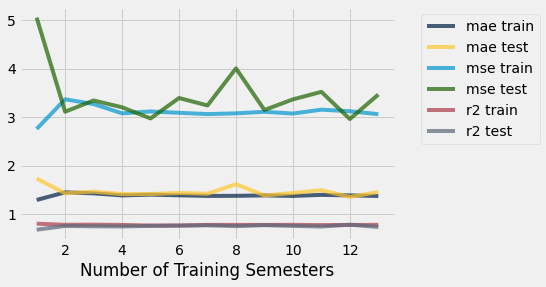

In [27]:
plot_error_score(df, columns, mjvoting)